In [2]:
import pandas as pd

In [3]:
# Load data of IT closing transaction
df = pd.read_csv('../CSV/ClosingTransaction.csv', sep=';', low_memory=False)

# Add name of column to dataframe 
df.columns = ['GjaeRecId', 'AccountingDate', 'CreatedDateTime', 'LedgerDimension', 'GroupChartOfAccountsValue', 'GroupChartOfAccountsName', 'Ledger', 'PostingLayer', 'SubledgerVoucher', 'SubledgerVoucherDataAreaId', 'CreatedBy', 'JournalCategory', 'PostingTypeLabel', 'PostingTypeValue', 'MainAccount', 'Text', 'JournalType', 'JournalTypeLabel', 'NumOfLines', 'CountLedgerJournal', 'TransactionCurrencyAmount', 'TransactionCurrencyCode', 'ClosingActivityDescription', 'ClosingActivityId']


In [4]:
# Convert the 'CreatedDateTime' column to the correct format
df['CreatedDateTime'] = pd.to_datetime(df['CreatedDateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# Convert the 'AccountingDate' column to the correct format
df['AccountingDate'] = pd.to_datetime(df['AccountingDate'], format='%Y-%m-%d %H:%M:%S.%f')

In [5]:
# Show the first 5 rows of the dataframe
pd.set_option('display.max_columns', None)
df.head()

,GjaeRecId,AccountingDate,CreatedDateTime,LedgerDimension,GroupChartOfAccountsValue,GroupChartOfAccountsName,Ledger,PostingLayer,SubledgerVoucher,SubledgerVoucherDataAreaId,CreatedBy,JournalCategory,PostingTypeLabel,PostingTypeValue,MainAccount,Text,JournalType,JournalTypeLabel,NumOfLines,CountLedgerJournal,TransactionCurrencyAmount,TransactionCurrencyCode,ClosingActivityDescription,ClosingActivityId
0,5657242189,2019-12-31,2020-01-01 16:15:26,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029332,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,ROSELLINA PANEBIANCO-2001132-2019-TRATTENUTA C...,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
1,5657242195,2019-12-31,2020-01-01 16:15:26,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029335,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,MARCO LAMANNA-2001135-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
2,5657242196,2019-12-31,2020-01-01 16:15:26,5637175227,L20205,Salary Payable,5637145326,0,4000029335,IT01,annamaria.massara,General journal,LedgerJournal,14,5637145466,MARCO LAMANNA-2001135-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,50.0,EUR,Post all adjustments in ledger,ACT32
3,5657242199,2019-12-31,2020-01-01 16:15:26,5637176302,A10450,Receivable - Other (No Contracts),5637145326,0,4000029337,IT01,annamaria.massara,General journal,CustBalance,31,5637145446,RECCARDO SIMONA-2001137-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,-50.0,EUR,Post and settle all received payments,ACT09
4,5657242198,2019-12-31,2020-01-01 16:15:26,5637175227,L20205,Salary Payable,5637145326,0,4000029336,IT01,annamaria.massara,General journal,LedgerJournal,14,5637145466,CORALLO DANIELE-2001136-2019-TRATTENUTA CEDOLINO,0.0,Daily,89.0,1.0,50.0,EUR,Post all adjustments in ledger,ACT32


In [6]:
# Dimension of dataframe
df.shape


(10288510, 24)

In [7]:
# Type of data in dataframe
df.dtypes

GjaeRecId                              int64
AccountingDate                datetime64[ns]
CreatedDateTime               datetime64[ns]
LedgerDimension                        int64
GroupChartOfAccountsValue             object
GroupChartOfAccountsName              object
Ledger                                 int64
PostingLayer                           int64
SubledgerVoucher                      object
SubledgerVoucherDataAreaId            object
CreatedBy                             object
JournalCategory                       object
PostingTypeLabel                      object
PostingTypeValue                       int64
MainAccount                            int64
Text                                  object
JournalType                          float64
JournalTypeLabel                      object
NumOfLines                           float64
CountLedgerJournal                   float64
TransactionCurrencyAmount            float64
TransactionCurrencyCode               object
ClosingAct

In [8]:
# Change SubledgerVoucherDataAreaId field from lower case to upper case
df['SubledgerVoucherDataAreaId'] = df['SubledgerVoucherDataAreaId'].str.upper()

In [9]:
# Count number of transactions per subledgervoucherdataareaid
df['SubledgerVoucherDataAreaId'].value_counts()

SubledgerVoucherDataAreaId
PL01    3055112
GB03    2894118
FR13    2808100
RO01    1092979
IT01     438201
Name: count, dtype: int64

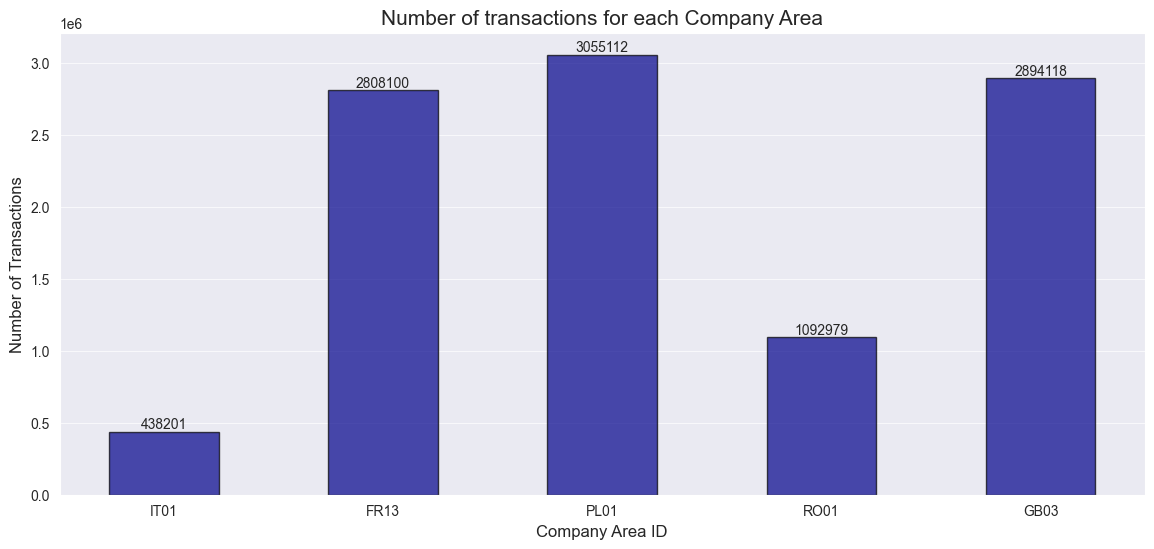

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('dark')

# Extract unique area names
area_names = df['SubledgerVoucherDataAreaId'].unique()

# Extract transaction counts for each area
area_counts = [df[df['SubledgerVoucherDataAreaId'] == area]['SubledgerVoucherDataAreaId'].count() for area in area_names]

# Plot histogram with seaborn style
plt.figure(figsize=(14, 6))
plt.bar(area_names, area_counts, color='darkblue', edgecolor='black', alpha=0.7, width=0.5)
plt.xlabel('Company Area ID', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Number of transactions for each Company Area', fontsize=15)
plt.xticks(ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)

# Add exact number of transactions on each bar
for i, count in enumerate(area_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


In [11]:
# Count number of transactions per CreatedBy
df['CreatedBy'].value_counts()

CreatedBy
angelika.kucharzyk     2052716
laetitia.rodrigues     1277366
rana.yacoub             680843
colin.may               654923
dorota.pagowska         514631
                        ...   
stephanie.quiviger           8
turgay.kayaer1               6
manoharan.shanmugam          3
sylwia.stefaniuk             2
marco.aloia                  2
Name: count, Length: 135, dtype: int64

In [12]:
# Count number of transactions per ClosingActivityId
df['ClosingActivityId'].value_counts()

ClosingActivityId
ACT32    3038549
ACT15    2651224
ACT17    2423596
ACT01     617335
ACT44     456976
ACT03     448650
ACT07     298824
ACT13     127621
ACT09     102012
ACT04      96528
ACT34      24426
ACT29       1968
ACT16        801
Name: count, dtype: int64